### Support Vector Machine(SVM)

Support Vector Machine(SVM): SVM are supervised machine learning models with associated learning algorithms that analyze data used for classification and regression analysis.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [ ]:
df_I=pd.read_csv("Iris.csv")
df_I.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df_I.shape

(150, 6)

In [ ]:
df_I.keys()

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [ ]:
df_I.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
df_I.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [ ]:
for cols in df_I.columns:
  print(df_I[cols].value_counts())

150    1
56     1
54     1
53     1
52     1
      ..
100    1
99     1
98     1
97     1
1      1
Name: Id, Length: 150, dtype: int64
5.0    10
6.3     9
5.1     9
6.7     8
5.7     8
5.5     7
5.8     7
6.4     7
6.0     6
4.9     6
6.1     6
5.4     6
5.6     6
6.5     5
4.8     5
7.7     4
6.9     4
5.2     4
6.2     4
4.6     4
7.2     3
6.8     3
4.4     3
5.9     3
6.6     2
4.7     2
7.6     1
7.4     1
4.3     1
7.9     1
7.3     1
7.0     1
4.5     1
5.3     1
7.1     1
Name: SepalLengthCm, dtype: int64
3.0    26
2.8    14
3.2    13
3.4    12
3.1    12
2.9    10
2.7     9
2.5     8
3.5     6
3.8     6
3.3     6
2.6     5
2.3     4
3.6     3
2.4     3
2.2     3
3.7     3
3.9     2
4.2     1
4.1     1
4.4     1
2.0     1
4.0     1
Name: SepalWidthCm, dtype: int64
1.5    14
1.4    12
5.1     8
4.5     8
1.3     7
1.6     7
5.6     6
4.0     5
4.9     5
4.7     5
4.8     4
1.7     4
4.4     4
4.2     4
5.0     4
4.1     3
5.5     3
4.6     3
6.1     3
5.7     3
3.9     3
5.8     

In [ ]:
from sklearn.preprocessing import LabelEncoder
d_types=dict(df_I.dtypes)

for name,type_ in d_types.items():
  if str(type_) == "object":
    le=LabelEncoder()
    df_I[name]=le.fit_transform(df_I[name])

In [ ]:
df_I.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    int64  
dtypes: float64(4), int64(2)
memory usage: 7.2 KB


In [ ]:
X=df_I.drop(["Species"],axis=1)
Y=df_I["Species"]

In [ ]:
X.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2


In [ ]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: Species, dtype: int64

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.25)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(112, 5)
(38, 5)
(112,)
(38,)


In [ ]:
#linear svm model
svc_clf=SVC(kernel="linear")
svc_clf.fit(X_train,y_train)
y_pred=svc_clf.predict(X_test)

In [ ]:
y_pred

array([0, 2, 1, 0, 2, 1, 2, 0, 0, 0, 2, 2, 2, 1, 2, 0, 1, 1, 2, 2, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 2, 2, 1, 2, 2, 0, 1])

In [ ]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df.head()

,Actual,Predicted
25,0,0
110,2,2
55,1,1
3,0,0
104,2,2


[[13  0  0]
 [ 0 12  0]
 [ 0  0 13]]


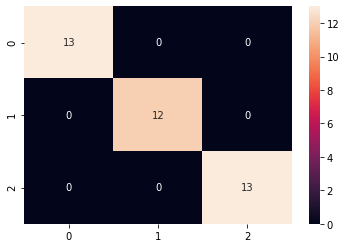

In [ ]:
cm=confusion_matrix(y_pred,y_test)
sns.heatmap(cm,annot=True)
print(cm)

In [ ]:
print(accuracy_score(y_pred,y_test))
print(classification_report(y_pred,y_test))

1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        13

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



In [ ]:
#rbf svm model
svc_clf_rbf=SVC(kernel="rbf")
svc_clf_rbf.fit(X_train,y_train)
y_pred=svc_clf_rbf.predict(X_test)

[[13  0  0]
 [ 0 12  0]
 [ 0  0 13]]


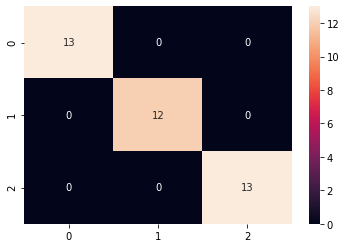

In [ ]:
cm=confusion_matrix(y_pred,y_test)
sns.heatmap(cm,annot=True)
print(cm)

In [ ]:
print(accuracy_score(y_pred,y_test))
print(classification_report(y_pred,y_test))

1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        13

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



### KNN

KNN: KNN is a supervised learning algorithm that can be used to solve both classfication and regression problem.
The KNN algorithm assumes that similar things exist in close proximity. In other words similar things are near to each other.

Two main Properties:

1. KNN is a lazy learning algorithm because it does not have a specialized training phases and uses all the data for training while classification.
2.KNN is also a non-parametric learning algorithm because it doesn't assume anything about the underlying data

KNN algorithm uses feature similarity to predict the values of new data points, which means that the new data point will be assigned a value based on how closely it matches with the training set points.

Steps:
1. Load the dataset
2. Initialize k to youe chosen number of neighbors
3. For each example in the data:
    3.1 Calculate the distance between the query example and the current example from the data.
    3.2 Add the distance and index of the example to an ordered collection
4. Sort the ordered collection of distances and indices from smallest to largest by the distances
5. Pick the first K entries from the sorted collection.
6. Get the labels of the selected K entries.
7. If regression, then return the mean of the K labels.
8. If classification, then return the mode of the K labels.


In [ ]:
df_I=pd.read_csv("Iris.csv")
df_I.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
from sklearn.preprocessing import LabelEncoder
d_types=dict(df_I.dtypes)

for name,type_ in d_types.items():
  if str(type_) == "object":
    le=LabelEncoder()
    df_I[name]=le.fit_transform(df_I[name])

In [ ]:
X=df_I.drop(["Species"],axis=1)
Y=df_I["Species"]

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.25)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
clf=KNeighborsClassifier(n_neighbors=1)
clf.fit(X_train,y_train)
y_pred_1=clf.predict(X_test)

In [ ]:
y_pred_1

array([1, 2, 1, 2, 2, 2, 1, 1, 0, 0, 2, 0, 1, 1, 0, 2, 2, 1, 2, 0, 1, 1,
       0, 0, 1, 0, 2, 0, 1, 2, 2, 2, 0, 2, 1, 0, 0, 1])

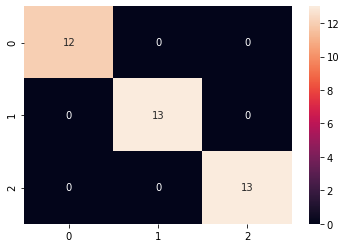

In [ ]:
cm_1=confusion_matrix(y_pred_1,y_test)
sns.heatmap(cm_1,annot=True)

In [ ]:
print(accuracy_score(y_pred_1,y_test))
print(classification_report(y_pred_1,y_test))

1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



## Naive Bayes

Naive Bayes is a supervised machine learning Algorithm that uses the Bayes theorem, which assumes that features are statistically independent.

The theorem relies on the naive assumption that input variables are independent of each other i.e. there is no way to know anything about other variables when given an additional variable.

Bayes Theroem: Bayes theorem is a theorem based on conditional probability or in a simple terms, the likelihood that an event A will happen given that event B has already happened.

In [ ]:
df_I=pd.read_csv("Iris.csv")
df_I.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
from sklearn.preprocessing import LabelEncoder
d_types=dict(df_I.dtypes)

for name,type_ in d_types.items():
  if str(type_) == "object":
    le=LabelEncoder()
    df_I[name]=le.fit_transform(df_I[name])

In [ ]:
X=df_I.drop(["Species"],axis=1)
Y=df_I["Species"]

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.25)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
clf=MultinomialNB()
clf.fit(X_train,y_train)
y_pred_1=clf.predict(X_test)

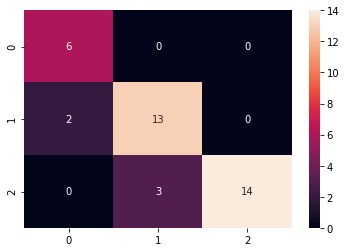

In [ ]:
cm_1=confusion_matrix(y_pred_1,y_test)
sns.heatmap(cm_1,annot=True)

In [ ]:
print(accuracy_score(y_pred_1,y_test))
print(classification_report(y_pred_1,y_test))

0.868421052631579
              precision    recall  f1-score   support

           0       0.75      1.00      0.86         6
           1       0.81      0.87      0.84        15
           2       1.00      0.82      0.90        17

    accuracy                           0.87        38
   macro avg       0.85      0.90      0.87        38
weighted avg       0.89      0.87      0.87        38



In [ ]:
from sklearn.naive_bayes import GaussianNB
clf2=GaussianNB()
clf2.fit(X_train,y_train)
y_pred_1=clf2.predict(X_test)

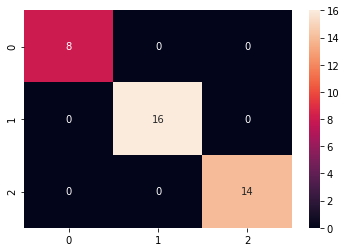

In [ ]:
cm_1=confusion_matrix(y_pred_1,y_test)
sns.heatmap(cm_1,annot=True)

In [ ]:
print(accuracy_score(y_pred_1,y_test))
print(classification_report(y_pred_1,y_test))

1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        16
           2       1.00      1.00      1.00        14

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38

